In [ ]:
!pip install chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
import chess
import chess.svg
from IPython.display import display, SVG

def dibujarReinas(reinas_pos):
  # Crear un tablero de ajedrez vacío
  tablero_vacio = chess.Board(fen="8/8/8/8/8/8/8/8 w - - 0 1")

  x = 0
  for y in reinas_pos:
    # Colocar una reina en una posición específica (x, y)
    # reinas_posiciones = [(0, 6), (1, 1), (2, 5), (3, 2),(4, 0),(5, 3),(6, 7),(7, 4)]
    posicion_reina = chess.square(x, y)  # Cambia las coordenadas según sea necesario
    tablero_vacio.set_piece_at(posicion_reina, chess.Piece(chess.QUEEN, chess.WHITE))
    x = x+1
  # Obtener la representación SVG del tablero vacío
  svg_tablero_vacio = chess.svg.board(board=tablero_vacio, size = 400)

  # Mostrar el tablero vacío en el cuaderno
  display(SVG(svg_tablero_vacio))

def conflicto(tablero):
    # Función para evaluar la cantidad de conflictos en el tablero
    conflicts = 0
    for i in range(len(tablero)):
        for j in range(i + 1, len(tablero)):
            if tablero[i] == tablero[j] or abs(tablero[i] - tablero[j]) == abs(i - j):
                conflicts += 1
    return conflicts


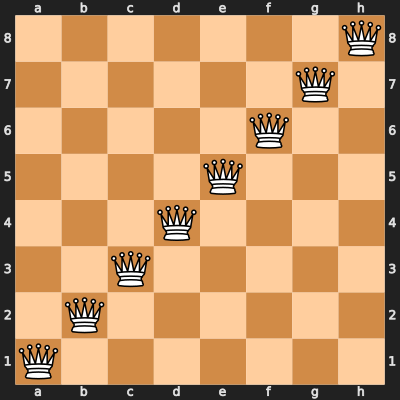

Heurística del valor del Conflicto 28


In [ ]:
tablero_test = [0,1,2,3,4,5,6,7]
dibujarReinas(tablero_test)
print("Heurística del valor del Conflicto",conflicto(tablero_test))

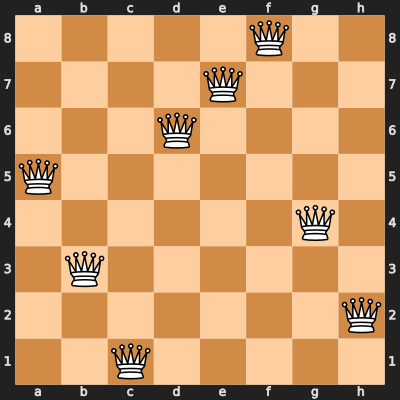

Conflicto con el Tablero Inicial  4


In [ ]:
def generar_tablero_aleatorio():
    tablero = list(range(8))
    random.shuffle(tablero)
    return tablero



tablero_inicial = generar_tablero_aleatorio()
dibujarReinas(tablero_inicial)

print("Conflicto con el Tablero Inicial ", conflicto(tablero_inicial))

### **Busqueda Local**


Encontrado en 110786 iteraciones
Solución busqueda local [1, 3, 5, 7, 2, 0, 6, 4]


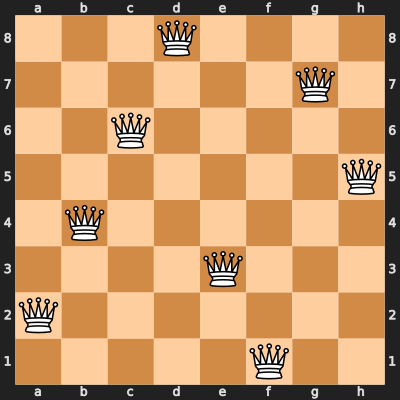

In [ ]:
import random



def busqueda_local(tablero_inicial, max_iter=1000):
    tablero_actual = tablero_inicial[:]
    for i in range(max_iter):
        conflicto_actual = conflicto(tablero_actual)

        if conflicto_actual == 0:
            print("Encontrado en "+str(i)+ " iteraciones")
            return tablero_actual  # ¡Solución encontrada!

        # Mueve una reina a una posición aleatoria
        fila = random.randint(0, 7)
        columna = random.randint(0, 7)
        tablero_actual[fila] = columna

    return None  # No se encontró una solución en el límite de iteraciones

# Uso del algoritmo de búsqueda local
iteraciones = 2000000
solucion = busqueda_local(tablero_inicial,iteraciones)
print("Solución busqueda local", solucion)
if solucion is not None:
  dibujarReinas(solucion)
else:
  print("No se encontró la solución en "+str(iteraciones)+" iteraciones")

### **Busqueda local con Haz estocástico**

Encontrado en 713 iteraciones
Solución encontrada (Búsqueda Local con Haz Estocástico): [4, 0, 3, 5, 7, 1, 6, 2]


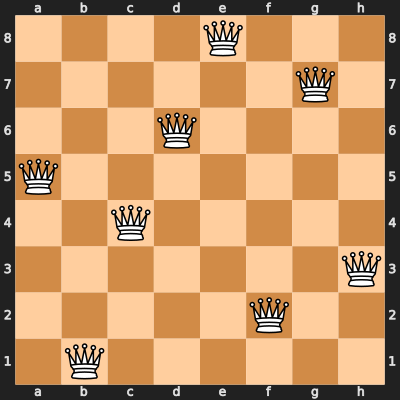

In [ ]:
def busqueda_local_haz_estocastico(tablero_inicial, haz_size=5, max_iter=1000):
    tablero_actual = tablero_inicial[:]
    for i in range(max_iter):
        conflicto_actual = conflicto(tablero_actual)
        if conflicto_actual == 0:
            print("Encontrado en "+str(i)+ " iteraciones")
            return tablero_actual  # Solución encontrada

        # Evaluar posiciones vecinas y elegir las mejores según el tamaño del haz
        vecinos = [tablero_actual[:] for _ in range(haz_size)]
        for i in range(haz_size):
            fila = random.randint(0, 7)
            columna = random.randint(0, 7)
            vecinos[i][fila] = columna

        mejor_vecino = min(vecinos, key=lambda x: conflicto(x))
        tablero_actual = mejor_vecino

    return None  # No se encontró una solución en el límite de iteraciones

# Uso del algoritmo de búsqueda local con haz estocástico
# Uso del algoritmo de búsqueda local
iteraciones = 2000000
solucion_haz_estocastico = busqueda_local_haz_estocastico(tablero_inicial)
print("Solución encontrada (Búsqueda Local con Haz Estocástico):", solucion_haz_estocastico)
if solucion_haz_estocastico is not None:
  dibujarReinas(solucion_haz_estocastico)
else:
  print("No se encontró la solución en "+str(iteraciones)+" iteraciones")


### **Temple Simulado**

Encontrado en 821 iteraciones
Solución encontrada: [5, 7, 1, 3, 0, 6, 4, 2]


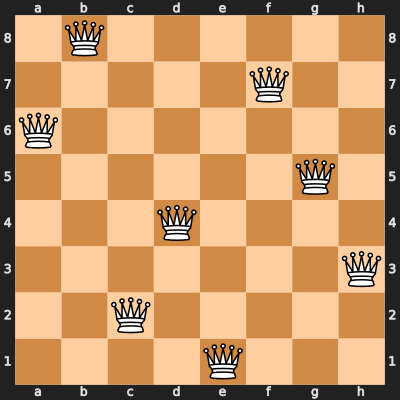

In [ ]:
import math

def recocido_simulado(tablero_inicial, temp_inicial=1000, temp_final=0.1, enfriamiento=0.99, max_iter=1000):
    tablero_actual = tablero_inicial[:]
    temp = temp_inicial

    for i in range(max_iter):
        conflicto_actual = conflicto(tablero_actual)
        if conflicto_actual == 0:
            print("Encontrado en "+str(i)+ " iteraciones")
            return tablero_actual  # ¡Solución encontrada!

        # Mueve una reina a una posición aleatoria
        fila = random.randint(0, 7)
        columna = random.randint(0, 7)
        tablero_nuevo = tablero_actual[:]
        tablero_nuevo[fila] = columna

        conflicto_nuevo = conflicto(tablero_nuevo)
        delta_conflicto = conflicto_nuevo - conflicto_actual

        if delta_conflicto < 0 or random.random() < math.exp(-delta_conflicto / temp):
            tablero_actual = tablero_nuevo

        temp *= enfriamiento

        if temp < temp_final:
            break

    return None  # No se encontró una solución en el límite de iteraciones

# Uso del algoritmo de recocido simulado
solucion_rs = recocido_simulado(tablero_inicial)
print("Solución encontrada:", solucion_rs)

if solucion_rs is not None:
  dibujarReinas(solucion_rs)
else:
  print("No se encontró la solución en "+str(iteraciones)+" iteraciones")


# **Algoritmo Genetico**

Encontrado en 102 iteraciones
[6, 4, 2, 0, 5, 7, 1, 3]


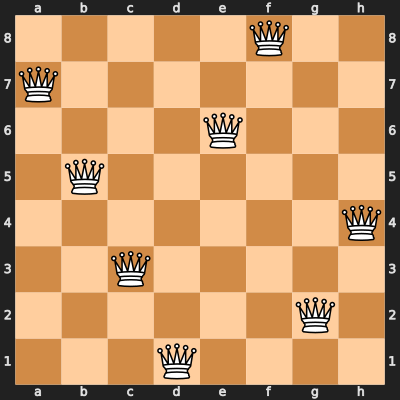

In [ ]:
import random

def generar_poblacion(tam_poblacion):
    return [[random.randint(0, 7) for _ in range(8)] for _ in range(tam_poblacion)]

def seleccion_padres(poblacion, fitness):
    # Torneo de selección
    torneo_size = 3
    padres = []
    for _ in range(len(poblacion)):
        torneo = random.sample(list(enumerate(fitness)), torneo_size)
        torneo.sort(key=lambda x: x[1])
        padres.append(poblacion[torneo[0][0]])
    return padres

def cruzar(padre1, padre2):
    punto_cruce = random.randint(1, len(padre1) - 1)
    hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
    hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]
    return hijo1, hijo2

def mutar(individuo, prob_mutacion):
    if random.random() < prob_mutacion:
        indice_mutacion = random.randint(0, len(individuo) - 1)
        nuevo_valor = random.randint(0, 7)
        individuo[indice_mutacion] = nuevo_valor
    return individuo

def algoritmo_genetico(tam_poblacion=100, prob_mutacion=0.1, max_iter=1000):
    poblacion = generar_poblacion(tam_poblacion)

    for i in range(max_iter):
        fitness = [conflicto(individuo) for individuo in poblacion]

        if 0 in fitness:
            print("Encontrado en "+str(i)+ " iteraciones")
            return poblacion[fitness.index(0)]  # ¡Solución encontrada!

        padres = seleccion_padres(poblacion, fitness)
        nueva_generacion = []

        while len(nueva_generacion) < tam_poblacion:
            padre1, padre2 = random.sample(padres, 2)
            hijo1, hijo2 = cruzar(padre1, padre2)
            hijo1 = mutar(hijo1, prob_mutacion)
            hijo2 = mutar(hijo2, prob_mutacion)
            nueva_generacion.extend([hijo1, hijo2])

        poblacion = nueva_generacion

    return None  # No se encontró una solución en el límite de iteraciones

# Uso del algoritmo genético
iteraciones = 200
solucion_ag = algoritmo_genetico(max_iter=iteraciones)
print(solucion_ag)
if solucion_ag is not None:
  dibujarReinas(solucion_ag)
else:
  print("No se encontró la solución en "+str(iteraciones)+" iteraciones")


### **Ascenso de Colina**

Escogencia de vecinos Random
Encontrado en 3 iteraciones
Logró encontrar una solución (Ascenso de Colina o Hill Climbing)
Solución encontrada (Ascenso de Colina - Seleccion random de vecinos): [5, 2, 0, 7, 3, 1, 6, 4]


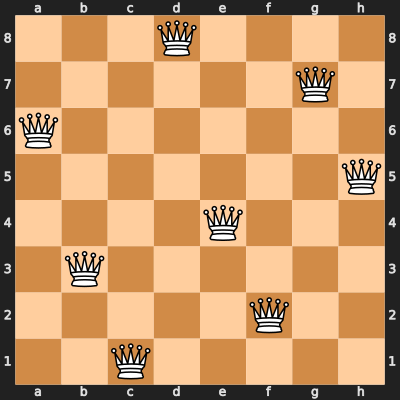

Escogencia de vecinos segun score (escogencia fija)
No logró encontrar una solución (Ascenso de Colina o Hill Climbing). Estancado en óptimo local
Solución encontrada (Ascenso de Colina - Seleccion mejores vecinos): [5, 2, 4, 7, 3, 1, 6, 0]


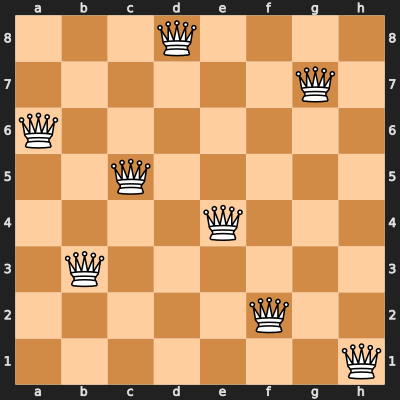

In [ ]:
import random


def generar_vecinos(tablero):
    vecinos = []
    for i in range(len(tablero)):
        for j in range(8):
            if j != tablero[i]:
                vecino = tablero.copy()
                vecino[i] = j
                vecinos.append(vecino)
    return vecinos

def ascenso_colina_vecinosRandom(tablero_inicial, max_iter=1000):
    tablero_actual = tablero_inicial[:]

    for i in range(max_iter):
        conflicto_actual = conflicto(tablero_actual)
        if conflicto_actual == 0:
            print("Encontrado en "+str(i)+ " iteraciones")
            print("Logró encontrar una solución (Ascenso de Colina o Hill Climbing)")
            return tablero_actual  # Solución encontrada

        vecinos = generar_vecinos(tablero_actual)
        vecinos.sort(key=lambda x: conflicto(x))

        # Seleccionar aleatoriamente un vecino entre los que tienen el mismo número de conflictos
        vecinos_mejores = [vecino for vecino in vecinos if conflicto(vecino) == conflicto(vecinos[0])]
        tablero_actual = random.choice(vecinos_mejores)

    print("No logró encontrar una solución (Ascenso de Colina o Hill Climbing). Estancado en óptimo local")
    return tablero_actual  # Devolver la solución actual

def ascenso_colina_vecinosOrdenados(tablero_inicial, max_iter=1000):
    tablero_actual = tablero_inicial[:]

    for i in range(max_iter):
        conflicto_actual = conflicto(tablero_actual)
        if conflicto_actual == 0:
            print("Encontrado en "+str(i)+ " iteraciones")
            print("Logró encontrar una solución (Ascenso de Colina o Hill Climbing)")
            return tablero_actual  # Solución encontrada

        vecinos = generar_vecinos(tablero_actual)
        vecinos.sort(key=lambda x: conflicto(x))

        if conflicto(vecinos[0]) >= conflicto_actual:
            print("No logró encontrar una solución (Ascenso de Colina o Hill Climbing). Estancado en óptimo local")
            return tablero_actual  # Estancado en un óptimo local

        tablero_actual = vecinos[0]

    return None  # No se encontró una solución en el límite de iteraciones

iteraciones = 2000000000
print("Escogencia de vecinos Random")
solucion_ascenso_colina = ascenso_colina_vecinosRandom(tablero_inicial, max_iter = iteraciones)
print("Solución encontrada (Ascenso de Colina - Seleccion random de vecinos):", solucion_ascenso_colina)
if solucion_ascenso_colina is not None:
  dibujarReinas(solucion_ascenso_colina)
else:
  print("No se encontró la solución ")

print("Escogencia de vecinos segun score (escogencia fija)")
solucion_ascenso_colina = ascenso_colina_vecinosOrdenados(tablero_inicial, max_iter = iteraciones)
print("Solución encontrada (Ascenso de Colina - Seleccion mejores vecinos):", solucion_ascenso_colina)
if solucion_ascenso_colina is not None:
  dibujarReinas(solucion_ascenso_colina)
else:
  print("No se encontró la solución ")



### **Descenso del gradiente**

Solución encontrada (Descenso del Gradiente): [1 5 1 6 2 3 4 6]


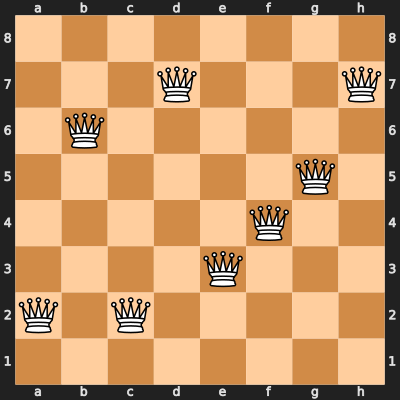

In [ ]:
import random
import numpy as np


def calcular_gradiente(tablero):
    n = len(tablero)
    gradiente = np.zeros(n)

    for i in range(n):
        for j in range(n):
            if i != j:
                gradiente[i] += 2 * (tablero[i] - tablero[j])
                if abs(tablero[i] - tablero[j]) == abs(i - j):
                    gradiente[i] += 2  # Incrementar el gradiente si hay un conflicto

    return gradiente

def descenso_gradiente(tablero_inicial, tasa_aprendizaje=0.01, max_iter=1000):
    tablero_actual = np.array(tablero_inicial, dtype=np.float64)

    for _ in range(max_iter):
        gradiente = calcular_gradiente(tablero_actual)
        tablero_actual -= tasa_aprendizaje * gradiente

        if conflicto(tablero_actual) == 0:
            return np.round(tablero_actual).astype(int)  # Solución encontrada

    return np.round(tablero_actual).astype(int)  # Devolver la solución actual

# Uso del descenso del gradiente para el problema de las 8 reinas
solucion_descenso_gradiente = descenso_gradiente(tablero_inicial,tasa_aprendizaje=0.01, max_iter=1000000)
print("Solución encontrada (Descenso del Gradiente):", solucion_descenso_gradiente)

if solucion_descenso_gradiente is not None:
  dibujarReinas(solucion_descenso_gradiente)
else:
  print("No se encontró la solución en "+str(iteraciones)+" iteraciones")


Solución encontrada (Descenso del Gradiente): [0 5 1 6 2 3 4 7]


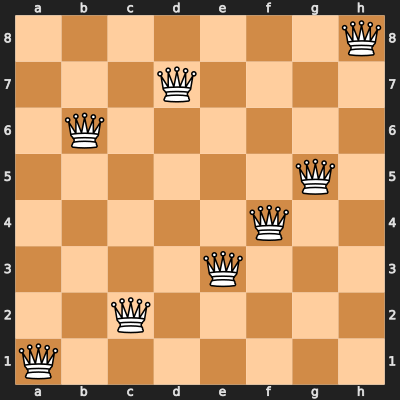

In [ ]:
def calcular_gradiente(tablero):
    n = len(tablero)
    gradiente = np.zeros(n)

    for i in range(n):
        for j in range(n):
            if i != j:
                gradiente[i] += 2 * (tablero[i] - tablero[j])
                if abs(tablero[i] - tablero[j]) == abs(i - j):
                    gradiente[i] += 2  # Incrementar el gradiente si hay un conflicto

    return gradiente

def descenso_gradiente(tablero_inicial, tasa_aprendizaje=0.01, max_iter=1000, limite_gradiente=10):
    tablero_actual = np.array(tablero_inicial, dtype=np.float64)

    for _ in range(max_iter):
        gradiente = calcular_gradiente(tablero_actual)

        # Limitar el valor absoluto del gradiente
        gradiente = np.clip(gradiente, -limite_gradiente, limite_gradiente)

        tablero_actual -= tasa_aprendizaje * gradiente

        if conflicto(tablero_actual) == 0:
            return np.round(tablero_actual).astype(int)  # Solución encontrada

    return np.round(tablero_actual).astype(int)  # Devolver la solución actual

# Uso del descenso del gradiente para el problema de las 8 reinas
solucion_descenso_gradiente = descenso_gradiente(tablero_inicial,tasa_aprendizaje=0.01, max_iter=1000000)
print("Solución encontrada (Descenso del Gradiente):", solucion_descenso_gradiente)

if solucion_descenso_gradiente is not None:
  dibujarReinas(solucion_descenso_gradiente)
else:
  print("No se encontró la solución en "+str(iteraciones)+" iteraciones")


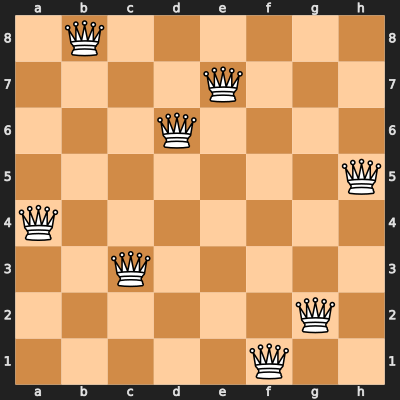

Solución encontrada (Descenso del Gradiente con Mejoras): [4 6 3 4 5 1 2 3]


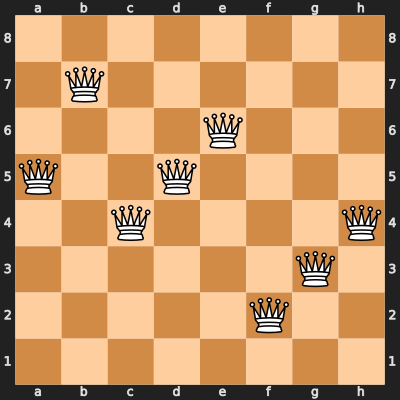

9


In [ ]:
def calcular_gradiente(tablero):
    n = len(tablero)
    gradiente = np.zeros(n)

    for i in range(n):
        for j in range(n):
            if i != j:
                gradiente[i] += 2 * (tablero[i] - tablero[j])
                if abs(tablero[i] - tablero[j]) == abs(i - j):
                    gradiente[i] += 2  # Incrementar el gradiente si hay un conflicto

    return gradiente

def descenso_gradiente(tablero_inicial, tasa_aprendizaje=0.01, max_iter=1000, limite_gradiente=10, momentum=0.9, recocido_simulado=False):
    tablero_actual = np.array(tablero_inicial, dtype=np.float64)
    velocidad = np.zeros_like(tablero_actual)

    for i in range(max_iter):
        gradiente = calcular_gradiente(tablero_actual)

        if recocido_simulado:
            tasa_aprendizaje = tasa_aprendizaje / (1 + i)  # Recocido simulado

        # Limitar el valor absoluto del gradiente
        gradiente = np.clip(gradiente, -limite_gradiente, limite_gradiente)

        # Actualizar la velocidad usando momento
        velocidad = momentum * velocidad - tasa_aprendizaje * gradiente

        # Actualizar las posiciones de las reinas
        tablero_actual += velocidad

        if conflicto(tablero_actual) == 0:

            return np.round(tablero_actual).astype(int)  # Solución encontrada

    return np.round(tablero_actual).astype(int)  # Devolver la solución actual

# Uso del descenso del gradiente para el problema de las 8 reinas
tablero_inicial = random.sample(range(8), 8)  # Inicialización aleatoria
dibujarReinas(tablero_inicial)
solucion_descenso_gradiente = descenso_gradiente(tablero_inicial, tasa_aprendizaje=0.01, max_iter=1000000, recocido_simulado=True)
print("Solución encontrada (Descenso del Gradiente con Mejoras):", solucion_descenso_gradiente)
dibujarReinas(solucion_descenso_gradiente)
print(conflicto(solucion_descenso_gradiente))
